### Upload The File

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arezaei81/hotel-bookingcvs")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-bookingcvs' dataset.
Path to dataset files: /kaggle/input/hotel-bookingcvs


In [ ]:
!ls /kaggle/input/hotel-bookingcvs


hotel_booking.csv


# Hotel Booking Cancellations Analysis & Prediction

## Problem Statement
The project focuses on predicting hotel booking cancellations, a critical task for revenue management and operational planning. The dataset includes diverse booking-related features (e.g., lead time, deposit type, special requests), requiring thorough preprocessing such as handling missing values, noise, and feature engineering. The goal is to train and evaluate multiple models, compare performance using appropriate metrics, and interpret key features driving cancellations.


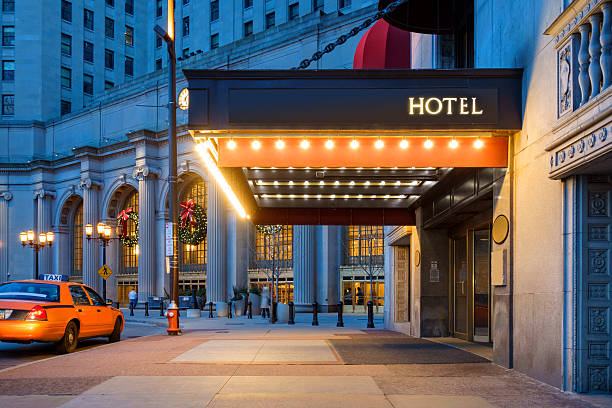

# Import The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/kaggle/input/hotel-bookingcvs/hotel_booking.csv")
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## 📊 Dataset Description

This dataset contains hotel booking information with details about guests, reservations, and cancellations.  
Below is an overview of the columns:

- **hotel**: Type of hotel (City Hotel or Resort Hotel).  
- **is_canceled**: Booking status → 1 if canceled, 0 if not.  
- **lead_time**: Number of days between the booking date and arrival date.  
- **arrival_date_year**: Year of arrival.  
- **arrival_date_month**: Month of arrival (e.g., January, February).  
- **arrival_date_week_number**: Week number of the year for arrival.  
- **arrival_date_day_of_month**: Day of arrival (1–31).  
- **stays_in_weekend_nights**: Number of weekend nights (Saturday and Sunday) stayed or booked.  
- **stays_in_week_nights**: Number of weekday nights stayed or booked.  
- **adults**: Number of adults in the booking.  
- **children**: Number of children in the booking.  
- **babies**: Number of babies in the booking.  
- **meal**: Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board).  
- **country**: Guest’s country of origin.  
- **market_segment**: Market segment designation (e.g., Online TA, Corporate).  
- **distribution_channel**: Booking distribution channel (e.g., TA/TO = Travel Agent/Tour Operator).  
- **is_repeated_guest**: 1 if the guest has booked before, 0 otherwise.  
- **previous_cancellations**: Number of previous bookings that were canceled by the customer.  
- **previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer.  
- **reserved_room_type**: Code of the room type reserved by the customer.  
- **assigned_room_type**: Code of the room type actually assigned.  
- **booking_changes**: Number of changes made to the booking.  
- **deposit_type**: Type of deposit made (No Deposit, Non Refund, Refundable).  
- **agent**: ID of the travel agency that made the booking.  
- **company**: ID of the company or organization that made the booking.  
- **days_in_waiting_list**: Number of days the booking was on the waiting list.  
- **customer_type**: Type of customer (e.g., Contract, Transient, Group).  
- **adr**: Average Daily Rate (average price per night per room).  
- **required_car_parking_spaces**: Number of car parking spaces required by the customer.  
- **total_of_special_requests**: Total number of special requests made by the customer.  
- **reservation_status**: Final status of the reservation (Canceled, Check-Out, No-Show).  
- **reservation_status_date**: Date of the last status update.  


# Exploaring Data Analysis





In [ ]:
import pandas as pd
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')


In [ ]:
df.shape


(119390, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Dataset Description
- The dataset contains **119,390 rows** and **36 columns**.  
- The target variable is **`is_canceled`** (1 = canceled, 0 = not canceled).  
- Key features include:  
  - `lead_time`: Number of days between booking and arrival.  
  - `adr`: Average daily rate paid by the customer.  
  - `deposit_type`: Type of deposit made.  
  - `special_requests`: Number of special requests made by the customer.  

**Data Types:**
*   16 integer columns
*   4 float columns
*   16 categorical (object) columns

**Missing Values:**
*  The column `children` has 4 missing values.
*  The column `agent` has 16,340 missing values.
*  The column `country` has 488 missing values.
*   The column `company` has a significant number of missing values, totaling 112,593.


####**Summary Statistics for Numerical Variables**


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Key Insights from Numerical Variables:**
- **Lead Time:** Avg `~104` days (range `0–737`).
- **Arrival Week Number:** Avg `~27` (range `1–53`).
- **Arrival Day of Month:** Avg `~16` (range `1–31`).
- **Stays:** Weekend nights avg `~0.9` (max `19`), Week nights avg `~2.5` (max `50`).
- **Guests:** Adults avg `1.9` (max `55`), Children avg `0.1` (max `10`), Babies avg `0.008` (max `10`).
- **Booking History:** Previous cancellations avg `0.09` (max `26`), Previous non-cancelled bookings avg `0.14` (max `72`).
- **Changes & Waiting:** Booking changes avg `0.22` (max `21`), Waiting list avg `2.3` days (max `391`).
- **ADR (Average Daily Rate):** Avg `101.8`, with extreme values (`-6.38` to `5400`) → likely outliers.
- **Parking & Requests:** Parking avg `0.06` (max `8`), Special requests avg `0.57` (max `5`).





####**Summary Statistics for Categorical Variables**

In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


**Key Insights from Categorical Variables:**

- **hotel**: 2 types; most frequent: *City Hotel* (79,330 / 119,390)  
- **arrival_date_month**: 12 months; most frequent: *August* (13,877)  
- **meal**: 5 types; most common: *BB* (92,310)  
- **country**: 178 countries; most frequent: *PRT* (Portugal) (48,590)  
- **market_segment**: 8 segments; most common: *Online TA* (56,477)  
- **distribution_channel**: 5 channels; most frequent: *TA/TO* (97,870)  
- **reserved_room_type & assigned_room_type**: multiple types, varying frequencies  
- **deposit_type**: 3 types; most frequent: *No Deposit* (104,641)  
- **customer_type**: 4 types; most frequent: *Transient* (89,613)  
- **reservation_status**: 3 statuses; most frequent: *Check-Out* (75,166)  
- **reservation_status_date**: 926 unique dates; most frequent: *2015-10-21* (1,461)
- **name**: 119,390 values; most frequent: Michael Johnson (48)  
- **email**: 119,390 values; most frequent: Michael.C@gmail.com (6)  
- **phone-number**: 119,390 values; most frequent: 422-804-6403 (1)  
- **credit_card**: 119,390 values; most frequent: ************3627 (28)  



### Dedecting The Missing Values



In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.isnull().mean()*100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


In [ ]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
columns_with_missing_values

,0
children,4
country,488
agent,16340
company,112593


From the results, we can see that some columns have missing values:

- `children`: **4** missing values  
- `country`: **488** missing values  
- `agent`: **16,340** missing values  
- `company`: **112,593** missing values  

This indicates that the **company** column has a very high percentage of missing data, while `children` and `country` have relatively small amounts of missing data.  
We will need to decide how to handle these missing values during preprocessing (e.g., imputation or removal).


### **Missing Values Visualization** **(Using Heatmap)**

The heatmap below shows the distribution of missing values across the dataset.
Missing values are highlighted in a different color to make it easier to identify which columns have incomplete data.


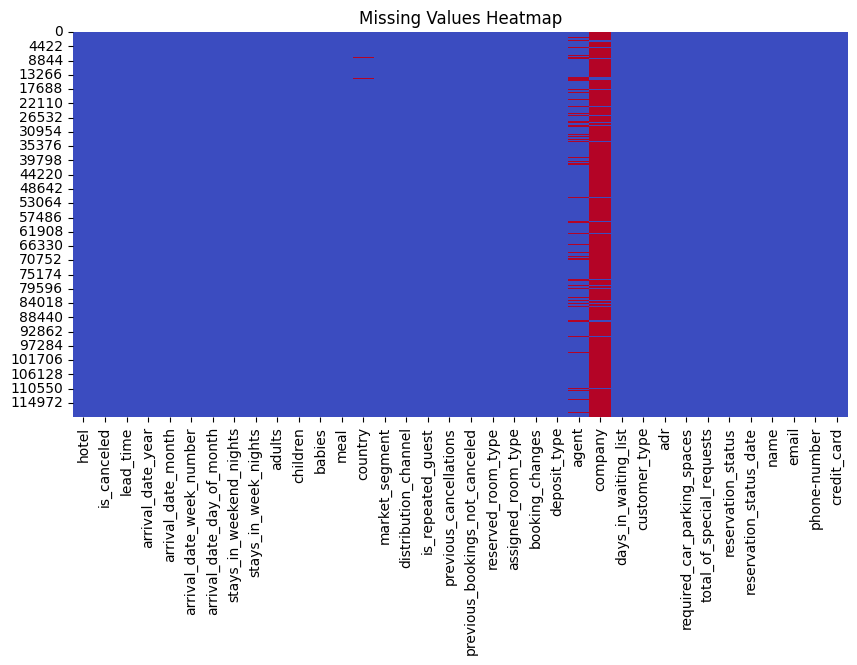

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


**Observation:**  
From the heatmap, we can clearly see which columns contain missing values.  
The lighter areas represent missing data, while the darker areas represent complete data.


### Class Balance (Cancellations vs. Non-Cancellations)

In this section, we check the distribution of the target variable `is_canceled` to see how many bookings were canceled (1) and how many were not canceled (0).  
This helps us understand whether the dataset is balanced or imbalanced, which is important for model training.


In [ ]:
df['is_canceled'].value_counts(normalize=True) * 100


,proportion
is_canceled,
0,62.958372
1,37.041628


**Class Balance Results:**

The results show that:  
- **0 (Not Canceled): ~62.96% of bookings**  
- **1 (Canceled): ~37.04% of bookings**  

This means the dataset is **somewhat imbalanced**, with more non-canceled bookings than canceled ones.  
Although the imbalance is not extreme, it is still important to keep in mind during model training, as it may affect the model’s ability to correctly predict cancellations.  
Techniques such as resampling or using appropriate evaluation metrics (e.g., F1-score, ROC-AUC) might be useful later.


##### Pie Chart for Target Variable (`is_canceled`)
We visualize the percentage of canceled vs. non-canceled bookings using a pie chart.  
This gives an immediate understanding of class imbalance in the target variable.


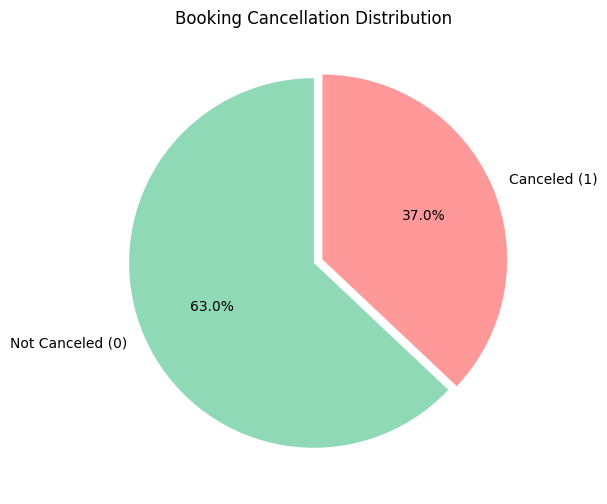

In [ ]:
# Count values
cancel_counts = df['is_canceled'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(cancel_counts, labels=['Not Canceled (0)', 'Canceled (1)'],
        autopct='%1.1f%%', startangle=90, colors=["#8fd9b6", "#ff9999"], explode=(0,0.05))
plt.title("Booking Cancellation Distribution")
plt.show()



The **Pie Chart** shows that **~63% of bookings were not canceled** and **~37% were canceled**.  
This imbalance is important to consider in model training and evaluation.

###Outlier Detection using the IQR Method

We applied the Interquartile Range (IQR) method to detect outliers in numerical columns.  
Values outside the calculated lower and upper bounds are considered outliers.  
The table below summarizes the number of outliers and bounds for each column.



In [ ]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
def detect_outliers_all(data):
    outliers_dict = {}
    for col in numeric_cols :
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)][col]
        if len(outliers) > 0:
            outliers_dict[col] = {
                "num_outliers": len(outliers),
                "lower_bound": lower,
                "upper_bound": upper
            }
    return outliers_dict

outliers_info = detect_outliers_all(df)
outliers_df = pd.DataFrame(outliers_info).T  # T = transpose
outliers_df = outliers_df.reset_index().rename(columns={'index':'column'})
outliers_df



,column,num_outliers,lower_bound,upper_bound
0,lead_time,3005.0,-195.000,373.000
1,stays_in_weekend_nights,265.0,-3.000,5.000
2,stays_in_week_nights,3354.0,-2.000,6.000
3,adults,29710.0,2.000,2.000
4,children,8590.0,0.000,0.000
5,babies,917.0,0.000,0.000
6,is_repeated_guest,3810.0,0.000,0.000
7,previous_cancellations,6484.0,0.000,0.000
8,previous_bookings_not_canceled,3620.0,0.000,0.000
9,booking_changes,18076.0,0.000,0.000


**Observation:**
The IQR method detected significant outliers in multiple columns such as
`adults`, `children`, `lead_time`, and `adr`. These outliers may require
further treatment (e.g., capping, transformation, or removal).


### **Outlier Visualization using Boxplots**

Boxplots allow us to visually identify the distribution of data and highlight potential outliers as points outside the whiskers.


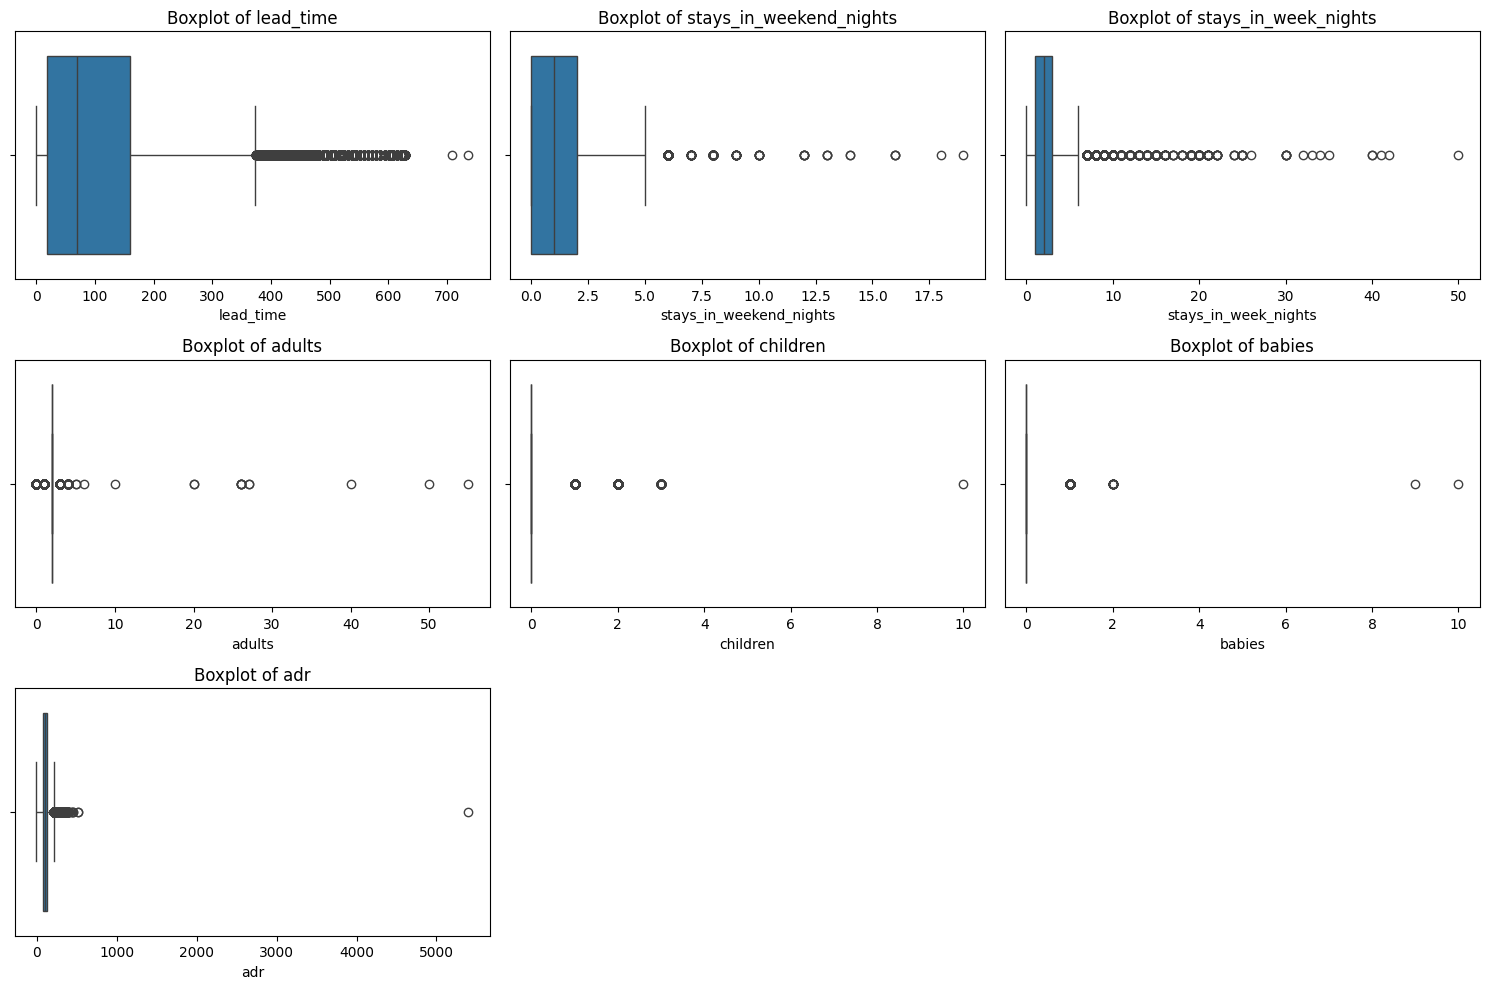

In [ ]:
numeric_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights',
                'adults','children','babies','adr']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


**Observation:**
From the boxplots, we can clearly see extreme values in `adr` and `lead_time`,
as well as discrete jumps in `adults` and `children`.
These plots visually confirm the findings of the IQR method.


# Exploratory Data Analysis -- Visualizations

Before applying preprocessing (encoding, scaling, etc.), it is important to explore the dataset visually.  
This helps us understand the distributions, detect outliers, check feature correlations, and identify potential issues.


###  Histograms for Distribution
Histograms allow us to see the distribution of numerical variables and check for skewness or imbalance.  
We focus on features such as:
- `lead_time`  
- `adr`  
- `total_of_special_requests`  

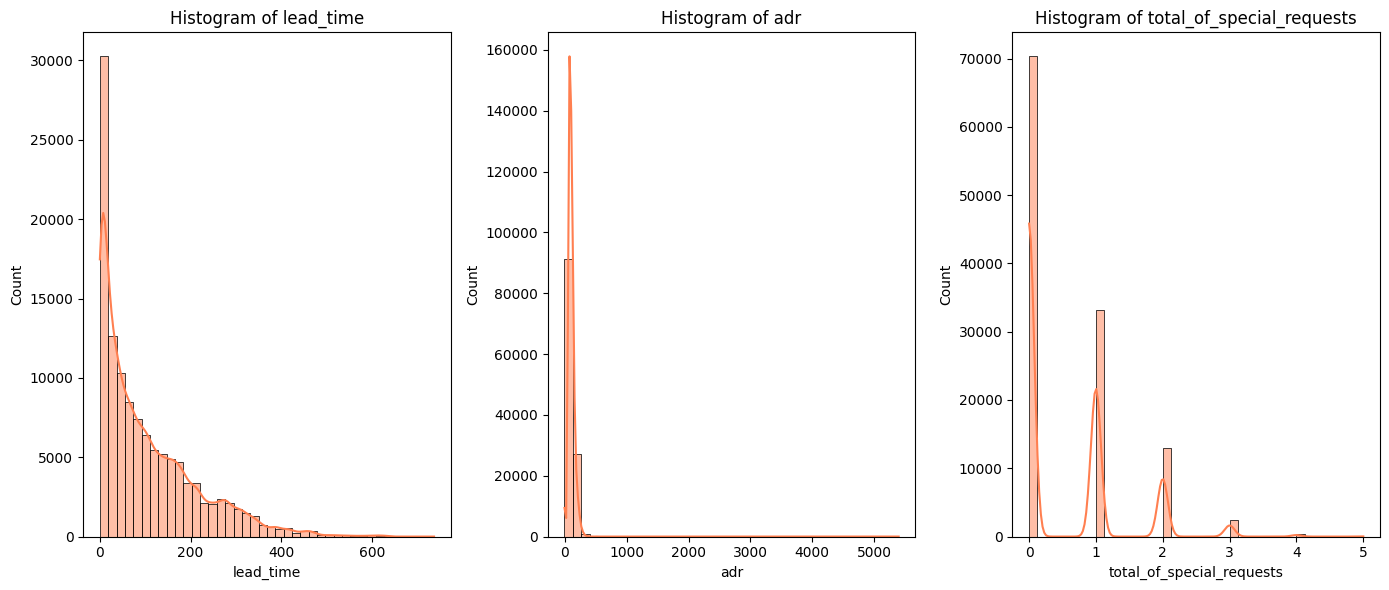

In [ ]:
num_cols = ['lead_time', 'adr', 'total_of_special_requests']

plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="coral")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


The **Histograms** above show that most bookings have short lead times, ADR values are skewed toward lower prices, and most customers make only a few special requests.


### Countplots for Categorical Variables
Countplots show the frequency of categories for features such as:
- `hotel`  
- `deposit_type`  
- `customer_type`  
- `market_segment`  


/tmp/ipython-input-2485034673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-2485034673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-2485034673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-2485034673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

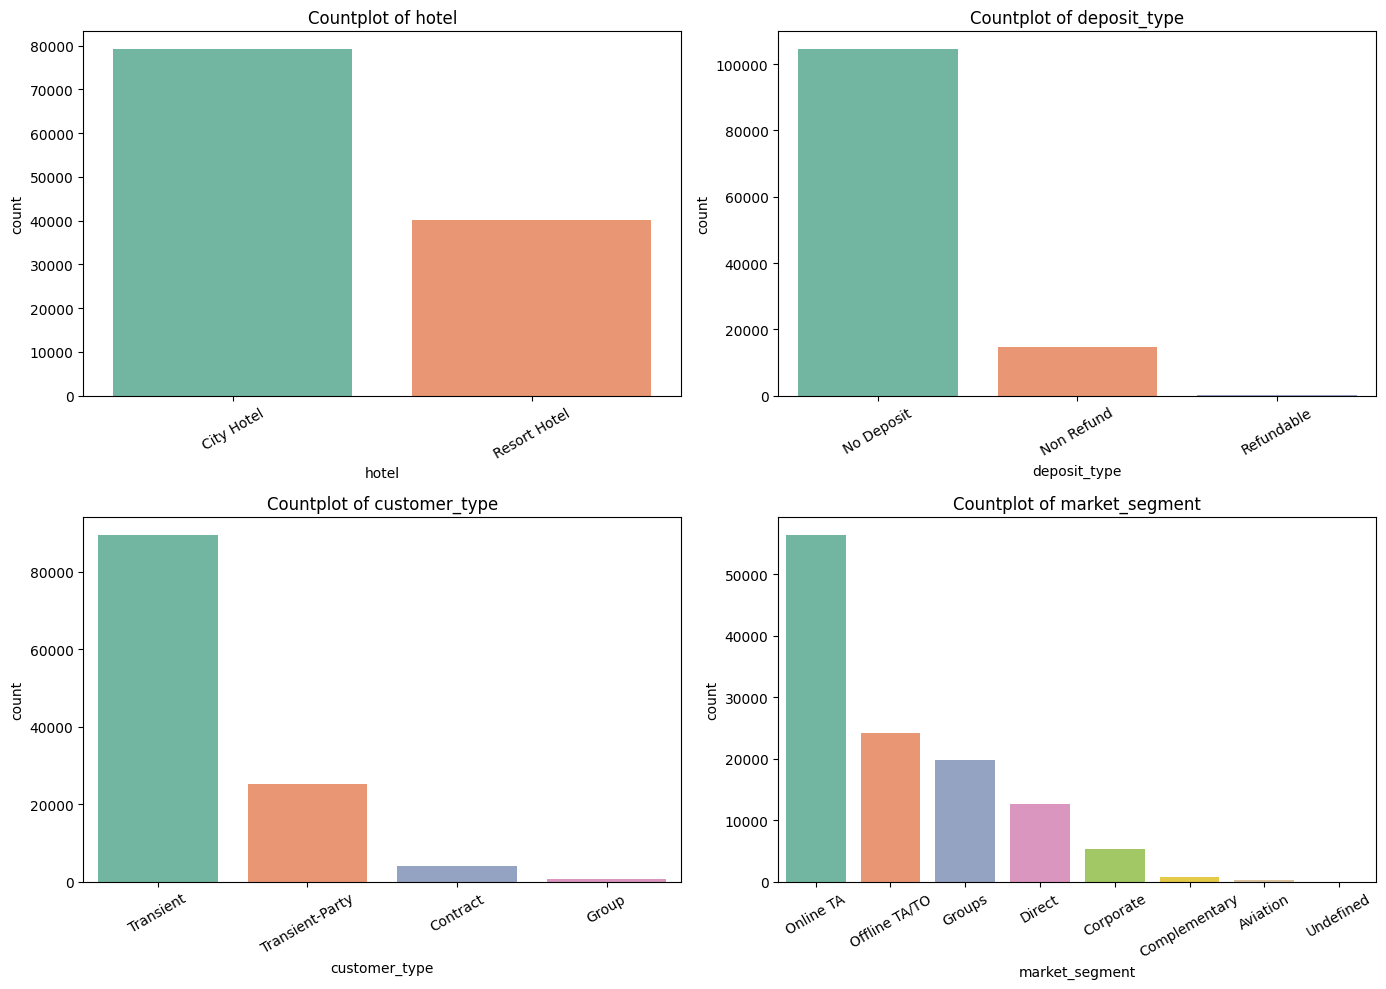

In [ ]:
cat_cols = ['hotel', 'deposit_type', 'customer_type', 'market_segment']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


The **Countplots** above indicate that most bookings are from ***City Hotels***, most customers pay with ***No Deposit***, and the majority are ***Transient*** guests.**Online TA** is the dominant market segment.


### Correlation Heatmap
We plot a correlation heatmap for numerical features to understand relationships between them (e.g., `lead_time`, `adr`, `total_guests`, `total_nights`).

This helps us detect strong correlations and multicollinearity.


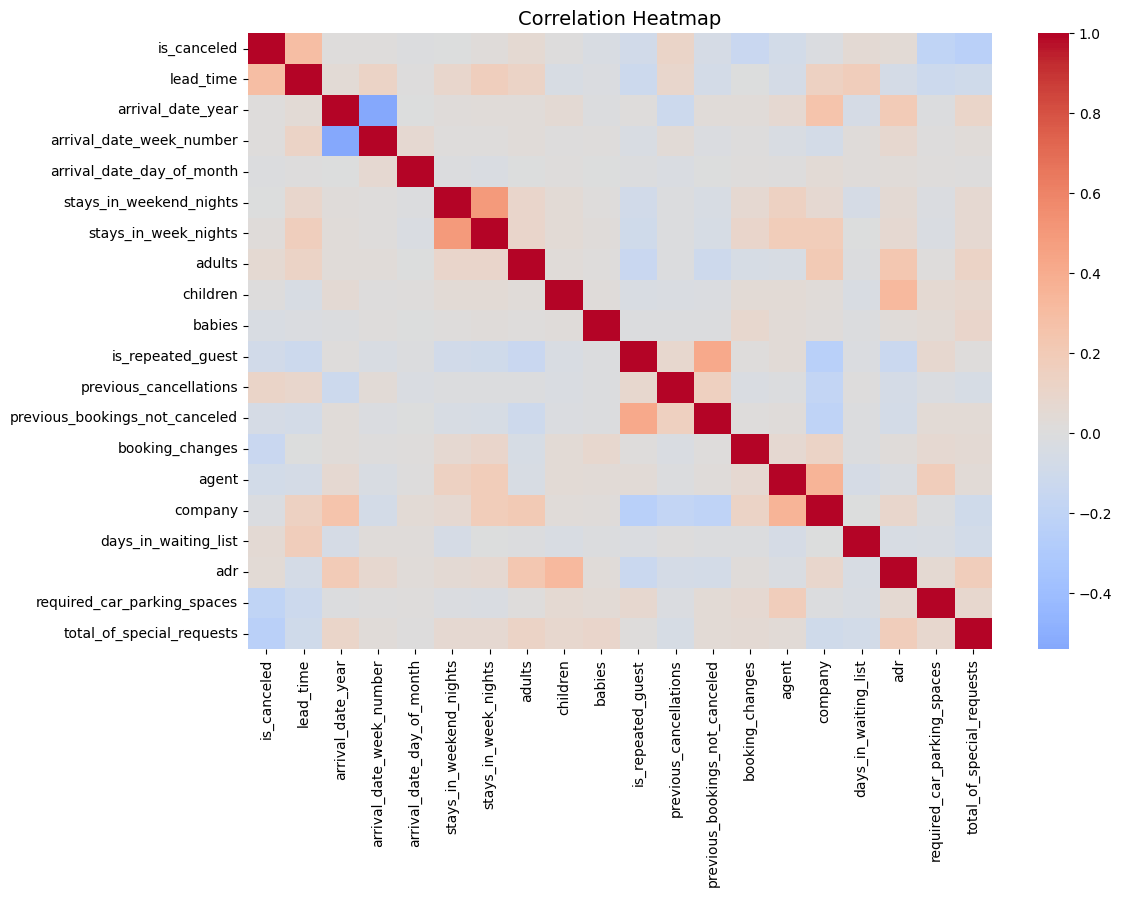

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


The **Heatmap** shows that `total_guests` is strongly correlated with `adults`, and `total_nights` is correlated with both `stays_in_week_nights` and `stays_in_weekend_nights`. This may affect feature selection later.


# Data Cleaning

## **Handling Missing Values**
We will fix missing values in the dataset using different strategies depending on the column nature.

In [ ]:
# 1) Company & Agent → missing means no company/agent, so we replace with 0
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# 2) Country → replace missing with the mode (most frequent country)
df['country'] = df['country'].fillna(df['country'].mode()[0])

# 3) Children → very few missing values, so we use median
df['children'] = df['children'].fillna(df['children'].median())

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


After handling missing values, all columns now show **0 missing entries**.  
This confirms that the dataset is clean from null values and ready for further processing.  

## **Remove Duplicates**
Duplicate rows can bias the analysis by giving extra weight to repeated bookings.  
We will check for duplicates in the dataset and drop them to ensure each record is unique.


In [ ]:
# Check number of duplicate rows
duplicates_count = df.duplicated().sum()
duplicates_count
# Drop duplicate rows
df = df.drop_duplicates()

# Re-check after dropping
new_duplicates_count = df.duplicated().sum()
new_duplicates_count

np.int64(0)

**Outcome:**  

- Before cleaning: 8,031 duplicate rows were found in the dataset.  
- After cleaning: 0 duplicate rows remain.  

✅ All duplicates have been successfully removed, ensuring dataset uniqueness.


## **Handling Outliers**
We will treat extreme values in certain columns to avoid skewing our analysis.  
The chosen method is **capping (winsorization)**, where unrealistic values are replaced with reasonable maximum or minimum limits.  


In [ ]:
# Lead Time: Cap at 365
df['lead_time'] = df['lead_time'].apply(lambda x: 365 if x > 365 else x)

# Stays in Weekend Nights: Cap at 10
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].apply(lambda x: 10 if x > 10 else x)

# Stays in Week Nights: Cap at 30
df['stays_in_week_nights'] = df['stays_in_week_nights'].apply(lambda x: 30 if x > 30 else x)

# ADR (Average Daily Rate): Negative values → set to 0. Very high values (>1000) capped at 1000.
df['adr'] = df['adr'].apply(lambda x: 0 if x < 0 else (1000 if x > 1000 else x))

# Adults: Replace 0 with 1
df['adults'] = df['adults'].apply(lambda x: 1 if x == 0 else x)


### ✅ Outcome After Handling Outliers
- **Lead Time** capped at **365** → removed unrealistic booking times beyond a year.  
- **Stays in Weekend Nights** capped at **10** → prevented extreme rare weekend stays.  
- **Stays in Week Nights** capped at **30** → avoided very long stays that distort averages.  
- **ADR (Average Daily Rate)** cleaned → negative values set to **0**, extreme values capped at **1000**.  
- **Adults** column fixed → bookings with **0 adults** replaced with **1** (ensuring realistic records).  

👉 The dataset is now free from **unrealistic extreme values**, making it **more reliable for analysis and modeling**.


## **Fixing Data Types**
To ensure proper analysis of time-based trends, we need to convert date-related columns into the correct `datetime` format.


In [ ]:
# Convert reservation_status_date to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

### 📌 Fix Data Types
- Converted **`reservation_status_date`** from object to `datetime64[ns]` for proper date handling.  



# Data Pre-Processing
Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming raw data into a format that can be understood by machine learning algorithms.

### Removing Directly Related & Irrelevant Features:
We drop columns that either:
- Directly reveal the target variable (`is_canceled`) → data leakage risk.  
- Contain sensitive or irrelevant information (`name`, `email`, `phone-number`, `credit_card`).  

This ensures the dataset only includes meaningful, non-leaking features for modeling.

In [ ]:
# Drop directly related & irrelevant columns
df = df.drop([
    'reservation_status',
    'reservation_status_date',
    'name',
    'email',
    'phone-number',
    'credit_card'
], axis=1)

# Check result
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,365,2015,July,27,1,0,0,2,...,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1


## Feautre Engineering
We create new meaningful features to enrich the dataset:

1. **Total Guests**: Sum of adults, children, and babies in the booking.  
2. **Total Nights**: Sum of weekend nights and week nights.  
3. **Is Family**: Binary flag (1 if children or babies are included, 0 otherwise).  
4. **Stay Duration Category**: Categorizes the total stay as 'Short', 'Medium', or 'Long'.  
5. **Season**: Identifies the season of arrival (Winter, Spring, Summer, Autumn).  

In [ ]:
# 1. Total Guests
df["total_guests"] = df["adults"] + df["children"].fillna(0) + df["babies"].fillna(0)

# 2. Total Nights
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

# 3. Is Family (1 if booking has children or babies, else 0)
df["is_family"] = ((df["children"].fillna(0) + df["babies"].fillna(0)) > 0).astype(int)

# 4. Stay Duration Category
df["stay_duration_category"] = pd.cut(
    df["total_nights"],
    bins=[0, 2, 7, 100],
    labels=["Short", "Medium", "Long"],
    right=False
)

# 5. Season based on arrival month
season_map = {
    "December": "Winter", "January": "Winter", "February": "Winter",
    "March": "Spring", "April": "Spring", "May": "Spring",
    "June": "Summer", "July": "Summer", "August": "Summer",
    "September": "Autumn", "October": "Autumn", "November": "Autumn"
}
df["season"] = df["arrival_date_month"].map(season_map)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family,stay_duration_category,season
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2.0,0,0,Short,Summer
1,Resort Hotel,0,365,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2.0,0,0,Short,Summer
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,1.0,1,0,Short,Summer
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,1.0,1,0,Short,Summer
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,2.0,2,0,Medium,Summer


## Encode Categorical Variables

To prepare the categorical variables for modeling, we will:
1. Apply **Label Encoding** to ordinal variables (e.g., `arrival_date_month`).
2. Apply **One-Hot Encoding** to nominal variables (e.g., `hotel`, `meal`, `market_segment`, etc.).
This ensures all categorical features are transformed into numerical format for the model.

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical Columns:")
categorical_cols


Categorical Columns:


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'stay_duration_category',
 'season']

In [ ]:
#  1. Label Encoding for Ordinal Variables
# Convert 'arrival_date_month' to numerical values (1-12)
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

#  2. One-Hot Encoding for Nominal Variables
one_hot_cols = [
    'hotel',
    'meal',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'stay_duration_category',
    'season'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [ ]:
# Encode 'country' column
df = pd.get_dummies(df, columns=['country'], drop_first=True)


In [ ]:
df = df.loc[:, ~df.columns.str.startswith("assigned_room_type_")]

In [ ]:
# 4. Convert all bool columns to uint8
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(np.uint8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 235 entries, is_canceled to country_ZWE
dtypes: float64(5), int64(19), uint8(211)
memory usage: 45.9 MB


## Feature Scaling

Feature scaling ensures that all numerical features are on a comparable scale,  
which is important for machine learning algorithms (especially those based on distance or gradient-based optimization).  

We will use **StandardScaler** from `sklearn.preprocessing` to standardize the numerical features.  

- Each feature will be transformed to have:  
  - **Mean = 0**  
  - **Standard Deviation = 1**  

⚠️ Note: The target variable `is_canceled` will not be scaled.


In [ ]:
# Identify numeric columns (exclude target 'is_canceled')
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "is_canceled"]

print("Numeric Columns to Scale:", numeric_cols)

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numeric columns only
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Check result
df.head()


Numeric Columns to Scale: ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests', 'total_nights', 'is_family']


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,0,2.385236,-1.634768,0.144799,-0.012141,-1.685297,-0.934104,-1.317736,0.245447,-0.260659,...,0,0,0,0,0,0,0,0,0,0
1,0,2.613842,-1.634768,0.144799,-0.012141,-1.685297,-0.934104,-1.317736,0.245447,-0.260659,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.944457,-1.634768,0.144799,-0.012141,-1.685297,-0.934104,-0.790569,-1.504979,-0.260659,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.884821,-1.634768,0.144799,-0.012141,-1.685297,-0.934104,-0.790569,-1.504979,-0.260659,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.874882,-1.634768,0.144799,-0.012141,-1.685297,-0.934104,-0.263402,0.245447,-0.260659,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.to_csv('hotel_data_processed.csv', index=False)

In [ ]:
df.shape

(119390, 235)

#Training The Models

## Splitting The Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Columns: 235 entries, is_canceled to country_ZWE
dtypes: float64(23), int64(1), uint8(211)
memory usage: 45.9 MB


In [ ]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### RandomForest Model Building

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)

    # Training set report
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Test set report
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Plots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns=[model_name])
    result = (result * 100).round(2).astype(str) + '%'
    return result



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60133
           1       0.99      0.99      0.99     35379

    accuracy                           1.00     95512
   macro avg       1.00      1.00      1.00     95512
weighted avg       1.00      1.00      1.00     95512


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     15033
           1       0.89      0.81      0.85      8845

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



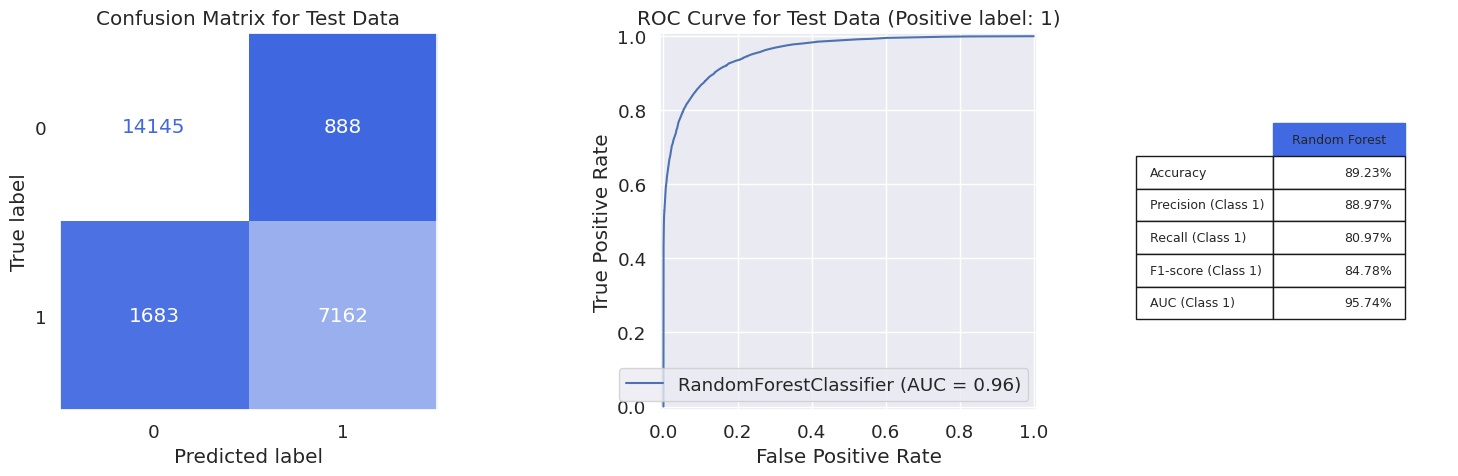

In [ ]:
model_evaluation(rf, X_train, X_test, y_train, y_test, 'Random Forest')

In [ ]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,89.23%
Precision (Class 1),88.97%
Recall (Class 1),80.97%
F1-score (Class 1),84.78%
AUC (Class 1),95.74%


### 🧩 Baseline Model – Random Forest Classifier

After completing data preprocessing, a baseline model was built using the **Random Forest Classifier** to predict hotel booking cancellations.

#### 🔧 Model Configuration
- **Algorithm:** Random Forest  
- **Test Size:** 20%  
- **Random State:** 42  
- **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, AUC  

#### 📊 Results

| Dataset | Accuracy | Precision | Recall | F1-score | Observation |
|----------|-----------|------------|----------|-------------|--------------|
| **Training Set** | 1.00 | 1.00 | 1.00 | 1.00 | Model performed perfectly on training data, indicating potential overfitting. |
| **Test Set** | 0.89 | 0.89 | 0.81 | 0.85 | Strong generalization performance with minor signs of overfitting. |

#### 🧠 Interpretation
- The model achieved **89% accuracy** on unseen test data, which is a good baseline result.  
- Training performance was perfect (100%), suggesting slight **overfitting**.  
- Precision (0.89) and Recall (0.81) show the model is able to identify most of the canceled bookings while maintaining good precision.  
- Future improvements can include:
  - Hyperparameter tuning (e.g., adjusting `max_depth`, `min_samples_split`)
  - Trying other algorithms like **XGBoost** or **Logistic Regression**
  - Balancing the dataset if class imbalance exists.

#### ✅ Conclusion
This Random Forest model serves as a strong **baseline**


## Handling Imbalance

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sampling_strategies = {}

# Strategy 1: Original (No resampling)
sampling_strategies['Original'] = (X_train, y_train)

# Strategy 2: SMOTE (Oversampling minority class)
print("\n⏳ Applying SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
sampling_strategies['SMOTE'] = (X_train_smote, y_train_smote)
print(f"✅ SMOTE done: {X_train_smote.shape}")

# Strategy 3: Random Undersampling
print("\n⏳ Applying Random Undersampling...")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
sampling_strategies['Undersampling'] = (X_train_rus, y_train_rus)
print(f"✅ Undersampling done: {X_train_rus.shape}")

# Strategy 4: SMOTE + Tomek Links (Hybrid approach)
print("\n⏳ Applying SMOTE + Tomek...")
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_resample(X_train, y_train)
sampling_strategies['SMOTE+Tomek'] = (X_train_st, y_train_st)
print(f"✅ SMOTE+Tomek done: {X_train_st.shape}")


⏳ Applying SMOTE...
✅ SMOTE done: (120266, 234)

⏳ Applying Random Undersampling...
✅ Undersampling done: (70758, 234)

⏳ Applying SMOTE + Tomek...
✅ SMOTE+Tomek done: (117436, 234)


In [ ]:
def get_models():
    """Return dictionary of models to test"""
    # Calculate scale_pos_weight for imbalanced data
    neg_count = (y_train == 0).sum()
    pos_count = (y_train == 1).sum()
    scale_weight = neg_count / pos_count

    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=15,
            min_samples_split=10,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'  # Handle imbalance
        ),
        'XGBoost': XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=scale_weight,
            random_state=42,
            n_jobs=-1,
            eval_metric='logloss'
        ),
        'LightGBM': LGBMClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=scale_weight,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )
    }
    return models

In [ ]:
# 4. EVALUATION FUNCTION
# ============================================

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and return metrics"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }
    return metrics

In [ ]:
results = []

for strategy_name, (X_tr, y_tr) in sampling_strategies.items():
    print(f"\n{'='*70}")
    print(f"📊 Strategy: {strategy_name}")
    print(f"{'='*70}")
    print(f"Training samples: {X_tr.shape[0]}")
    print(f"Class distribution: {pd.Series(y_tr).value_counts().to_dict()}")

    models = get_models()

    for model_name, model in models.items():
        print(f"\n  ⏳ Training {model_name}...")

        # Train model
        model.fit(X_tr, y_tr)

        # Evaluate
        metrics = evaluate_model(model, X_test, y_test, model_name)
        metrics['Sampling'] = strategy_name
        results.append(metrics)

        print(f"  ✅ {model_name} done!")
        print(f"     Recall: {metrics['Recall']:.4f} | F1: {metrics['F1-Score']:.4f}")


📊 Strategy: Original
Training samples: 95512
Class distribution: {0: 60133, 1: 35379}

  ⏳ Training Random Forest...
  ✅ Random Forest done!
     Recall: 0.8188 | F1: 0.8130

  ⏳ Training XGBoost...
  ✅ XGBoost done!
     Recall: 0.8561 | F1: 0.8175

  ⏳ Training LightGBM...
  ✅ LightGBM done!
     Recall: 0.8566 | F1: 0.8154

  ⏳ Training Logistic Regression...
  ✅ Logistic Regression done!
     Recall: 0.7720 | F1: 0.7511

📊 Strategy: SMOTE
Training samples: 120266
Class distribution: {0: 60133, 1: 60133}

  ⏳ Training Random Forest...
  ✅ Random Forest done!
     Recall: 0.8140 | F1: 0.8151

  ⏳ Training XGBoost...
  ✅ XGBoost done!
     Recall: 0.9034 | F1: 0.8002

  ⏳ Training LightGBM...
  ✅ LightGBM done!
     Recall: 0.9073 | F1: 0.8036

  ⏳ Training Logistic Regression...
  ✅ Logistic Regression done!
     Recall: 0.7375 | F1: 0.7432

📊 Strategy: Undersampling
Training samples: 70758
Class distribution: {0: 35379, 1: 35379}

  ⏳ Training Random Forest...
  ✅ Random Forest don

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Reorder columns
results_df = results_df[['Sampling', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']]

# Format as percentages
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']:
    results_df[col] = (results_df[col] * 100).round(2)

print("\n" + "="*70)
print("📊 COMPLETE RESULTS COMPARISON")
print("="*70)
print(results_df.to_string(index=False))

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print("\n✅ Results saved to 'model_comparison_results.csv'")


📊 COMPLETE RESULTS COMPARISON
     Sampling               Model  Accuracy  Precision  Recall  F1-Score   AUC
     Original       Random Forest     86.05      80.74   81.88     81.30 93.69
     Original             XGBoost     85.84      78.22   85.61     81.75 94.32
     Original            LightGBM     85.64      77.80   85.66     81.54 94.26
     Original Logistic Regression     81.05      73.13   77.20     75.11 89.43
        SMOTE       Random Forest     86.32      81.61   81.40     81.51 93.62
        SMOTE             XGBoost     83.29      71.81   90.34     80.02 93.96
        SMOTE            LightGBM     83.57      72.12   90.73     80.36 94.04
        SMOTE Logistic Regression     81.12      74.89   73.75     74.32 89.27
Undersampling       Random Forest     86.09      80.45   82.49     81.46 93.80
Undersampling             XGBoost     82.48      69.87   92.66     79.67 94.27
Undersampling            LightGBM     82.13      69.39   92.61     79.33 94.20
Undersampling Logisti

In [ ]:
# 7. FIND BEST MODEL
# Sort by Recall (most important for cancellations)
best_recall = results_df.nlargest(3, 'Recall')
print("\n" + "="*70)
print("🏆 TOP 3 MODELS BY RECALL (Best for Cancellation Detection)")
print("="*70)
print(best_recall.to_string(index=False))

# Sort by F1-Score (balanced metric)
best_f1 = results_df.nlargest(3, 'F1-Score')
print("\n" + "="*70)
print("🏆 TOP 3 MODELS BY F1-SCORE (Most Balanced)")
print("="*70)
print(best_f1.to_string(index=False))



🏆 TOP 3 MODELS BY RECALL (Best for Cancellation Detection)
     Sampling    Model  Accuracy  Precision  Recall  F1-Score   AUC
Undersampling  XGBoost     82.48      69.87   92.66     79.67 94.27
Undersampling LightGBM     82.13      69.39   92.61     79.33 94.20
        SMOTE LightGBM     83.57      72.12   90.73     80.36 94.04

🏆 TOP 3 MODELS BY F1-SCORE (Most Balanced)
Sampling         Model  Accuracy  Precision  Recall  F1-Score   AUC
Original       XGBoost     85.84      78.22   85.61     81.75 94.32
Original      LightGBM     85.64      77.80   85.66     81.54 94.26
   SMOTE Random Forest     86.32      81.61   81.40     81.51 93.62


## ✅ Final Model Selection: XGBoost (Original Data)

After evaluating multiple machine learning models under different sampling strategies, **XGBoost trained on the original (unbalanced) dataset** was selected as the **final and optimal model** for deployment.

### 🔍 Why XGBoost (Original Data) is the Best Choice

1. **Highest Overall Performance (Best F1-Score)**
   - The model achieved the **top F1-Score (81.75%)**, indicating the best balance between Precision and Recall.
   - This makes it the most reliable model for maintaining both correctness and sensitivity.

2. **Strong Generalization Ability**
   - XGBoost consistently delivered high **Accuracy (85.84%)** and **AUC (94.32%)** without requiring any resampling.
   - This reflects strong learning capability even under class imbalance.

3. **No Need for Sampling**
   - Tree-based models like XGBoost naturally handle class imbalance due to their splitting strategy.
   - Using the original dataset avoids the potential noise introduced by oversampling or information loss from undersampling.

4. **Most Stable and Interpretable Results**
   - Results were more stable compared to SMOTE, Undersampling, or SMOTE+Tomek.
   - This stability makes XGBoost more reliable for real production settings.

### 🎯 Conclusion
> **XGBoost (Original Data) offers the best overall performance, highest stability, and most balanced predictive power among all tested models.**  
It is therefore selected as the final model for this project.


## Hyperparameter Tunning

In [ ]:
# Calculate scale_pos_weight
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_weight = neg_count / pos_count

baseline_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

print("\n📊 Baseline Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_baseline):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_baseline):.4f}")
print(f"AUC:       {roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1]):.4f}")


📊 Baseline Performance:
Accuracy:  0.8584
Precision: 0.7822
Recall:    0.8561
F1-Score:  0.8175
AUC:       0.9432


In [ ]:
from sklearn.model_selection import (
    train_test_split, cross_val_score,
    RandomizedSearchCV, StratifiedKFold
)
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve,
    precision_recall_curve, RocCurveDisplay,
    ConfusionMatrixDisplay, make_scorer
)

In [ ]:
# Define parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Base model for tuning
xgb_base = XGBClassifier(
    scale_pos_weight=scale_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# Define custom scorer focusing on recall and F1
f1_scorer = make_scorer(f1_score)

# Stratified K-Fold Cross-Validation
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV (faster than GridSearch)
print("⏳ Running RandomizedSearchCV...")
print("   • Testing 50 different parameter combinations")
print("   • Using 5-fold cross-validation")
print("   • Optimizing for F1-Score")

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=20,
    scoring=f1_scorer,
    cv=cv_strategy,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n✅ Hyperparameter tuning complete!")
print("\n🏆 Best Parameters Found:")
for param, value in random_search.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n📊 Best CV F1-Score: {random_search.best_score_:.4f}")

⏳ Running RandomizedSearchCV...
   • Testing 50 different parameter combinations
   • Using 5-fold cross-validation
   • Optimizing for F1-Score
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Hyperparameter tuning complete!

🏆 Best Parameters Found:
   • subsample: 0.8
   • reg_lambda: 1
   • reg_alpha: 0.01
   • n_estimators: 300
   • min_child_weight: 1
   • max_depth: 8
   • learning_rate: 0.1
   • gamma: 0
   • colsample_bytree: 0.8

📊 Best CV F1-Score: 0.8419


In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions
y_pred_tuned = best_model.predict(X_test)
y_proba_tuned = best_model.predict_proba(X_test)[:, 1]

print("\n✅ Final model trained successfully!")


✅ Final model trained successfully!


### Cross Validation

In [ ]:
cv_scores = {
    'Accuracy': cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1),
    'Precision': cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1),
    'Recall': cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1),
    'F1-Score': cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1),
    'AUC': cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
}

print("\n📊 Cross-Validation Results (Mean ± Std):")
for metric, scores in cv_scores.items():
    print(f"{metric:12s}: {scores.mean():.4f} ± {scores.std():.4f}")


📊 Cross-Validation Results (Mean ± Std):
Accuracy    : 0.8787 ± 0.0028
Precision   : 0.8129 ± 0.0044
Recall      : 0.8738 ± 0.0044
F1-Score    : 0.8422 ± 0.0036
AUC         : 0.9552 ± 0.0018


#Performance Comparison

In [ ]:
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Baseline': [
        accuracy_score(y_test, y_pred_baseline),
        precision_score(y_test, y_pred_baseline),
        recall_score(y_test, y_pred_baseline),
        f1_score(y_test, y_pred_baseline),
        roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])
    ],
    'Tuned': [
        accuracy_score(y_test, y_pred_tuned),
        precision_score(y_test, y_pred_tuned),
        recall_score(y_test, y_pred_tuned),
        f1_score(y_test, y_pred_tuned),
        roc_auc_score(y_test, y_proba_tuned)
    ]
})

comparison['Improvement'] = ((comparison['Tuned'] - comparison['Baseline']) / comparison['Baseline'] * 100).round(2)
comparison['Baseline'] = (comparison['Baseline'] * 100).round(2)
comparison['Tuned'] = (comparison['Tuned'] * 100).round(2)

print("\n" + comparison.to_string(index=False))
print("\n" + classification_report(y_test, y_pred_tuned,
                                   target_names=['Not Canceled (0)', 'Canceled (1)'],
                                   digits=4))




   Metric  Baseline  Tuned  Improvement
 Accuracy     85.84  87.90         2.40
Precision     78.22  81.23         3.85
   Recall     85.61  87.55         2.27
 F1-Score     81.75  84.27         3.09
      AUC     94.32  95.63         1.39

                  precision    recall  f1-score   support

Not Canceled (0)     0.9232    0.8810    0.9016     15033
    Canceled (1)     0.8123    0.8755    0.8427      8845

        accuracy                         0.8790     23878
       macro avg     0.8678    0.8783    0.8722     23878
    weighted avg     0.8822    0.8790    0.8798     23878



### Faeture Importance Analysis

In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🏆 Top 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Save full feature importance
feature_importance.to_csv('feature_importance.csv', index=False)
print("\n✅ Full feature importance saved to 'feature_importance.csv'")



🏆 Top 20 Most Important Features:
                       Feature  Importance
       deposit_type_Non Refund    0.385798
      market_segment_Online TA    0.079521
   required_car_parking_spaces    0.074592
                   country_PRT    0.034634
        previous_cancellations    0.027734
  market_segment_Offline TA/TO    0.016015
       customer_type_Transient    0.014970
         market_segment_Groups    0.014255
    distribution_channel_TA/TO    0.013383
     total_of_special_requests    0.012693
                   country_DEU    0.009829
 customer_type_Transient-Party    0.009574
                         agent    0.009184
   stay_duration_category_Long    0.008804
             arrival_date_year    0.008705
                   country_AGO    0.008088
               booking_changes    0.006490
                meal_Undefined    0.006166
   distribution_channel_Direct    0.005870
previous_bookings_not_canceled    0.005838

✅ Full feature importance saved to 'feature_importance.csv'


### THRESHOLD OPTIMIZATION

In [ ]:
# Calculate precision-recall for different thresholds
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_proba_tuned)
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-10)

# Find best threshold for F1
best_threshold_idx = np.argmax(f1_scores[:-1])  # Exclude last element
best_threshold = thresholds_pr[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"\n📌 Current threshold: 0.50")
print(f"   • Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

print(f"\n🎯 Optimal threshold: {best_threshold:.4f}")
y_pred_optimal = (y_proba_tuned >= best_threshold).astype(int)
print(f"   • Recall: {recall_score(y_test, y_pred_optimal):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_optimal):.4f}")

# Also show threshold for 90% recall
recall_90_idx = np.where(recall_vals >= 0.90)[0]
if len(recall_90_idx) > 0:
    threshold_90 = thresholds_pr[recall_90_idx[0]]
    y_pred_90 = (y_proba_tuned >= threshold_90).astype(int)
    print(f"\n🎯 Threshold for 90% Recall: {threshold_90:.4f}")
    print(f"   • Recall: {recall_score(y_test, y_pred_90):.4f}")
    print(f"   • Precision: {precision_score(y_test, y_pred_90):.4f}")
    print(f"   • F1-Score: {f1_score(y_test, y_pred_90):.4f}")


📌 Current threshold: 0.50
   • Recall: 0.8755
   • Precision: 0.8123
   • F1-Score: 0.8427

🎯 Optimal threshold: 0.5540
   • Recall: 0.8534
   • Precision: 0.8355
   • F1-Score: 0.8443

🎯 Threshold for 90% Recall: 0.0000
   • Recall: 1.0000
   • Precision: 0.3704
   • F1-Score: 0.5406


## Save The Final Model

In [ ]:
# Save the tuned model
import joblib
joblib.dump(best_model, 'xgboost_final_model.pkl')
print("✅ Model saved as 'xgboost_final_model.pkl'")

# Get best parameters from the model itself
try:
    best_params = random_search.best_params_
except:
    # If random_search not available, get params from best_model
    best_params = best_model.get_params()

# Save model metadata
model_info = {
    'model_type': 'XGBoost',
    'best_parameters': str(best_params),  # Convert to string for CSV
    'test_accuracy': accuracy_score(y_test, y_pred_tuned),
    'test_precision': precision_score(y_test, y_pred_tuned),
    'test_recall': recall_score(y_test, y_pred_tuned),
    'test_f1': f1_score(y_test, y_pred_tuned),
    'test_auc': roc_auc_score(y_test, y_proba_tuned),
    'optimal_threshold': best_threshold,
    'default_threshold': 0.5,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

pd.DataFrame([model_info]).to_csv('model_metadata.csv', index=False)
print("✅ Model metadata saved as 'model_metadata.csv'")

✅ Model saved as 'xgboost_final_model.pkl'
✅ Model metadata saved as 'model_metadata.csv'


## Final Model Visualization Dashboard

📊 GENERATING FINAL MODEL VISUALIZATION DASHBOARD

🔍 Verifying model...

1️⃣ baseline_model:
   Recall: 85.61%
   Precision: 78.22%

2️⃣ best_model:
   Recall: 87.55%
   Precision: 81.23%

3️⃣ random_search.best_estimator_ (FRESH):
   Recall: 87.55%
   Precision: 81.23%

✅ Using random_search.best_estimator_ (matches expected performance)

🎯 USING FINAL MODEL FOR DASHBOARD

📊 Dashboard will show these results:
   Accuracy:  87.90%
   Precision: 81.23%
   Recall:    87.55%
   F1-Score:  84.27%
   AUC:       95.63%

⏳ Creating dashboard...

✅ Dashboard saved as 'final_model_dashboard.png'
✅ High-resolution version saved as 'final_model_dashboard_high_res.png'


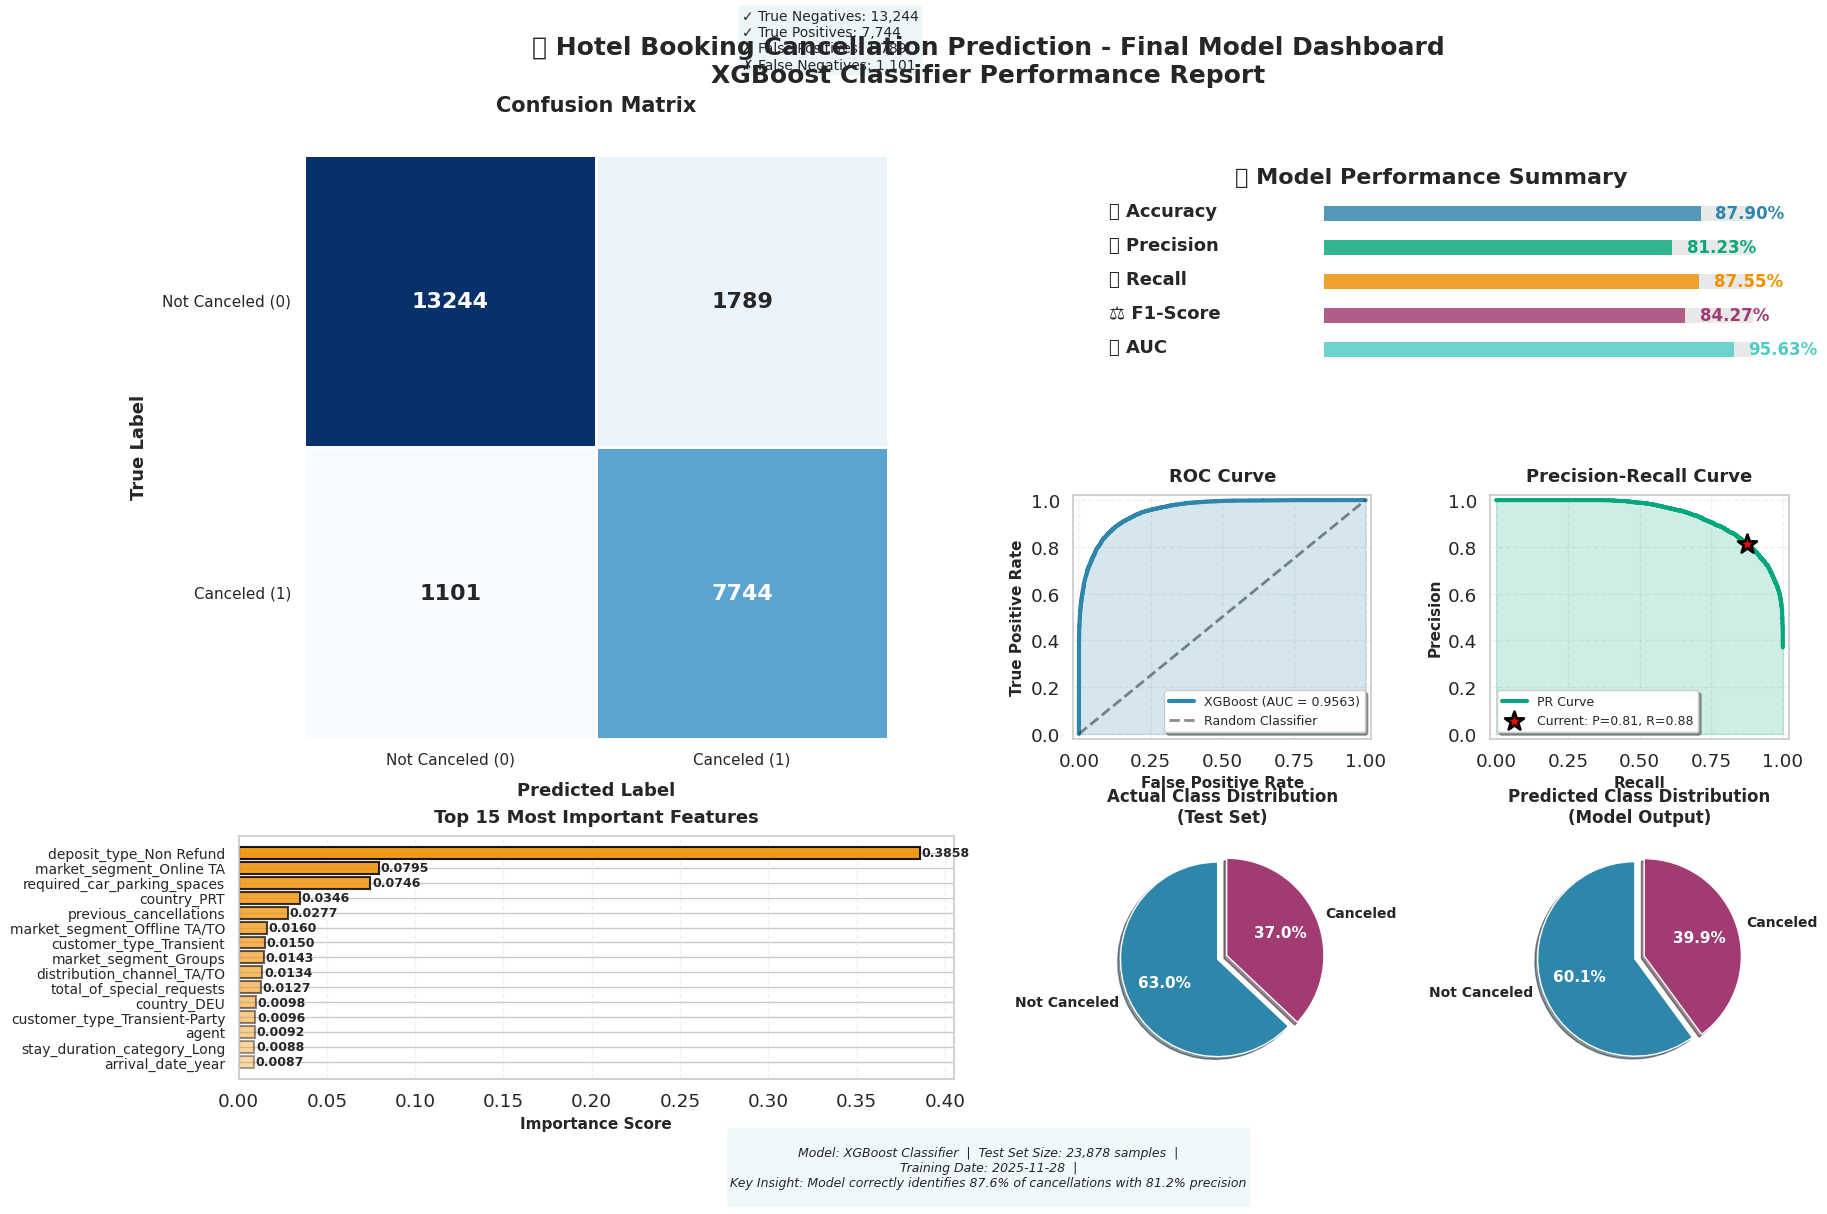


📋 DETAILED CLASSIFICATION REPORT

                  precision    recall  f1-score   support

Not Canceled (0)     0.9232    0.8810    0.9016     15033
    Canceled (1)     0.8123    0.8755    0.8427      8845

        accuracy                         0.8790     23878
       macro avg     0.8678    0.8783    0.8722     23878
    weighted avg     0.8822    0.8790    0.8798     23878


📊 MODEL PERFORMANCE SUMMARY TABLE

   Metric    Score Percentage                               Interpretation
 Accuracy 0.878968     87.90%   Correctly classifies 87.9% of all bookings
Precision 0.812336     81.23% 81.2% of predicted cancellations are correct
   Recall 0.875523     87.55%        Detects 87.6% of actual cancellations
 F1-Score 0.842747     84.27%                        Balanced score: 84.3%
  AUC-ROC 0.956327     95.63%          Model discriminative ability: 95.6%

✅ Summary saved as 'model_performance_summary.csv'


In [ ]:
"""
Hotel Booking Cancellation Prediction
Final Model Dashboard - CORRECTED VERSION
Use this AFTER training your model
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve,
    precision_recall_curve, ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("="*80)
print("📊 GENERATING FINAL MODEL VISUALIZATION DASHBOARD")
print("="*80)

# ============================================
# IMPORTANT: Use the CORRECT model
# ============================================
# The best_model should come from: random_search.best_estimator_
# WITHOUT calling .fit() again!

# Verify which model you're using
print("\n🔍 Verifying model...")

# Option 1: If you have baseline_model
try:
    pred_baseline = baseline_model.predict(X_test)
    recall_baseline = recall_score(y_test, pred_baseline)
    precision_baseline = precision_score(y_test, pred_baseline)
    print(f"\n1️⃣ baseline_model:")
    print(f"   Recall: {recall_baseline*100:.2f}%")
    print(f"   Precision: {precision_baseline*100:.2f}%")
except:
    pass

# Option 2: Check best_model
try:
    pred_best = best_model.predict(X_test)
    recall_best = recall_score(y_test, pred_best)
    precision_best = precision_score(y_test, pred_best)
    print(f"\n2️⃣ best_model:")
    print(f"   Recall: {recall_best*100:.2f}%")
    print(f"   Precision: {precision_best*100:.2f}%")
except:
    pass

# Option 3: Get fresh model from random_search
try:
    fresh_model = random_search.best_estimator_
    pred_fresh = fresh_model.predict(X_test)
    recall_fresh = recall_score(y_test, pred_fresh)
    precision_fresh = precision_score(y_test, pred_fresh)
    print(f"\n3️⃣ random_search.best_estimator_ (FRESH):")
    print(f"   Recall: {recall_fresh*100:.2f}%")
    print(f"   Precision: {precision_fresh*100:.2f}%")

    # Use this one if recall is around 87-88%
    if 0.85 <= recall_fresh <= 0.89:
        print("\n✅ Using random_search.best_estimator_ (matches expected performance)")
        final_model = fresh_model
    else:
        print("\n⚠️ This model doesn't match expected performance")
        final_model = best_model
except:
    final_model = best_model

# ============================================
# GENERATE PREDICTIONS FROM CORRECT MODEL
# ============================================
print("\n" + "="*80)
print("🎯 USING FINAL MODEL FOR DASHBOARD")
print("="*80)

y_pred_tuned = final_model.predict(X_test)
y_proba_tuned = final_model.predict_proba(X_test)[:, 1]

# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
auc = roc_auc_score(y_test, y_proba_tuned)

print(f"\n📊 Dashboard will show these results:")
print(f"   Accuracy:  {accuracy*100:.2f}%")
print(f"   Precision: {precision*100:.2f}%")
print(f"   Recall:    {recall*100:.2f}%")
print(f"   F1-Score:  {f1*100:.2f}%")
print(f"   AUC:       {auc*100:.2f}%")

# ============================================
# CREATE COMPREHENSIVE DASHBOARD
# ============================================
print("\n⏳ Creating dashboard...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.4)

# Define colors
color_palette = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#06A77D',
    'warning': '#F18F01',
    'info': '#4ECDC4',
    'light': '#E8F4F8',
    'dark': '#1A535C'
}

# ============================================
# 1. CONFUSION MATRIX (Top Left - Large)
# ============================================
ax1 = fig.add_subplot(gs[0:2, 0:2])

cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
            square=True, linewidths=2, linecolor='white',
            annot_kws={'size': 16, 'weight': 'bold'})

ax1.set_xlabel('Predicted Label', fontsize=13, fontweight='bold', labelpad=10)
ax1.set_ylabel('True Label', fontsize=13, fontweight='bold', labelpad=10)
ax1.set_title('Confusion Matrix\n', fontsize=15, fontweight='bold', pad=15)
ax1.set_xticklabels(['Not Canceled (0)', 'Canceled (1)'], fontsize=11)
ax1.set_yticklabels(['Not Canceled (0)', 'Canceled (1)'], fontsize=11, rotation=0)

# Add performance text
tn, fp, fn, tp = cm.ravel()
text_str = f'✓ True Negatives: {tn:,}\n✓ True Positives: {tp:,}\n✗ False Positives: {fp:,}\n✗ False Negatives: {fn:,}'
ax1.text(1.5, -0.5, text_str, fontsize=10,
         bbox=dict(boxstyle='round', facecolor=color_palette['light'], alpha=0.8),
         verticalalignment='top')

# ============================================
# 2. METRICS SUMMARY (Top Right)
# ============================================
ax2 = fig.add_subplot(gs[0, 2:])
ax2.axis('off')

# Title
ax2.text(0.5, 0.95, '📊 Model Performance Summary',
         ha='center', va='top', fontsize=16, fontweight='bold',
         transform=ax2.transAxes)

# Metrics with icons and colors
metrics_data = [
    ('🎯 Accuracy', accuracy, color_palette['primary']),
    ('🔍 Precision', precision, color_palette['success']),
    ('📈 Recall', recall, color_palette['warning']),
    ('⚖️ F1-Score', f1, color_palette['secondary']),
    ('📉 AUC', auc, color_palette['info'])
]

y_pos = 0.75
for i, (label, value, color) in enumerate(metrics_data):
    # Metric name and value
    ax2.text(0.05, y_pos - i*0.14, label,
             fontsize=13, fontweight='bold', transform=ax2.transAxes)

    # Progress bar background
    rect_bg = plt.Rectangle((0.35, y_pos - i*0.14 - 0.02), 0.6, 0.06,
                             facecolor='#E8E8E8', edgecolor='none',
                             transform=ax2.transAxes)
    ax2.add_patch(rect_bg)

    # Progress bar fill
    rect_fill = plt.Rectangle((0.35, y_pos - i*0.14 - 0.02), 0.6 * value, 0.06,
                               facecolor=color, edgecolor='none',
                               transform=ax2.transAxes, alpha=0.8)
    ax2.add_patch(rect_fill)

    # Percentage text
    ax2.text(0.35 + 0.6 * value + 0.02, y_pos - i*0.14 + 0.01,
             f'{value*100:.2f}%',
             fontsize=12, fontweight='bold', color=color,
             transform=ax2.transAxes, va='center')

# ============================================
# 3. ROC CURVE (Middle Left)
# ============================================
ax3 = fig.add_subplot(gs[1, 2])

fpr, tpr, _ = roc_curve(y_test, y_proba_tuned)
ax3.plot(fpr, tpr, linewidth=3, label=f'XGBoost (AUC = {auc:.4f})',
         color=color_palette['primary'])
ax3.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
ax3.fill_between(fpr, tpr, alpha=0.2, color=color_palette['primary'])

ax3.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax3.set_title('ROC Curve', fontsize=13, fontweight='bold', pad=10)
ax3.legend(loc='lower right', fontsize=9, frameon=True, shadow=True)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_xlim([-0.02, 1.02])
ax3.set_ylim([-0.02, 1.02])

# ============================================
# 4. PRECISION-RECALL CURVE (Middle Right)
# ============================================
ax4 = fig.add_subplot(gs[1, 3])

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba_tuned)
ax4.plot(recall_vals, precision_vals, linewidth=3,
         color=color_palette['success'], label='PR Curve')
ax4.fill_between(recall_vals, precision_vals, alpha=0.2, color=color_palette['success'])

# Mark current operating point
ax4.scatter([recall], [precision], s=200, c='red', marker='*',
            edgecolors='black', linewidths=2, zorder=5,
            label=f'Current: P={precision:.2f}, R={recall:.2f}')

ax4.set_xlabel('Recall', fontsize=11, fontweight='bold')
ax4.set_ylabel('Precision', fontsize=11, fontweight='bold')
ax4.set_title('Precision-Recall Curve', fontsize=13, fontweight='bold', pad=10)
ax4.legend(loc='best', fontsize=9, frameon=True, shadow=True)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.set_xlim([-0.02, 1.02])
ax4.set_ylim([-0.02, 1.02])

# ============================================
# 5. FEATURE IMPORTANCE (Bottom Left - Large)
# ============================================
ax5 = fig.add_subplot(gs[2, 0:2])

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

# Create horizontal bar plot
bars = ax5.barh(range(len(feature_importance)), feature_importance['importance'],
                color=color_palette['warning'], alpha=0.8, edgecolor='black', linewidth=1.5)

# Add gradient effect
for i, bar in enumerate(bars):
    bar.set_alpha(0.9 - i * 0.04)

ax5.set_yticks(range(len(feature_importance)))
ax5.set_yticklabels(feature_importance['feature'], fontsize=10)
ax5.invert_yaxis()
ax5.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax5.set_title('Top 15 Most Important Features', fontsize=13, fontweight='bold', pad=10)
ax5.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax5.text(row['importance'] + 0.001, i, f"{row['importance']:.4f}",
             va='center', fontsize=9, fontweight='bold')

# ============================================
# 6. CLASS DISTRIBUTION (Bottom Middle)
# ============================================
ax6 = fig.add_subplot(gs[2, 2])

# True labels distribution
class_counts = pd.Series(y_test).value_counts()
colors_dist = [color_palette['primary'], color_palette['secondary']]

wedges, texts, autotexts = ax6.pie(class_counts.values,
                                     labels=['Not Canceled', 'Canceled'],
                                     autopct='%1.1f%%',
                                     colors=colors_dist,
                                     startangle=90,
                                     explode=(0.05, 0.05),
                                     shadow=True,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})

ax6.set_title('Actual Class Distribution\n(Test Set)',
              fontsize=12, fontweight='bold', pad=10)

# Make percentage text white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

# ============================================
# 7. PREDICTION DISTRIBUTION (Bottom Right)
# ============================================
ax7 = fig.add_subplot(gs[2, 3])

# Predictions distribution
pred_counts = pd.Series(y_pred_tuned).value_counts()

wedges2, texts2, autotexts2 = ax7.pie(pred_counts.values,
                                        labels=['Not Canceled', 'Canceled'],
                                        autopct='%1.1f%%',
                                        colors=colors_dist,
                                        startangle=90,
                                        explode=(0.05, 0.05),
                                        shadow=True,
                                        textprops={'fontsize': 10, 'fontweight': 'bold'})

ax7.set_title('Predicted Class Distribution\n(Model Output)',
              fontsize=12, fontweight='bold', pad=10)

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)

# ============================================
# MAIN TITLE
# ============================================
fig.suptitle('🏨 Hotel Booking Cancellation Prediction - Final Model Dashboard\nXGBoost Classifier Performance Report',
             fontsize=18, fontweight='bold', y=0.98)

# Add footer with key info
footer_text = f"""
Model: XGBoost Classifier  |  Test Set Size: {len(y_test):,} samples  |
Training Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}  |
Key Insight: Model correctly identifies {recall*100:.1f}% of cancellations with {precision*100:.1f}% precision
"""
fig.text(0.5, 0.01, footer_text, ha='center', fontsize=9,
         style='italic', wrap=True,
         bbox=dict(boxstyle='round', facecolor=color_palette['light'], alpha=0.6))

# ============================================
# SAVE FIGURE
# ============================================
plt.savefig('final_model_dashboard.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("\n✅ Dashboard saved as 'final_model_dashboard.png'")

plt.savefig('final_model_dashboard_high_res.png', dpi=600, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✅ High-resolution version saved as 'final_model_dashboard_high_res.png'")

plt.show()

# ============================================
# DETAILED TEXT REPORT
# ============================================
print("\n" + "="*80)
print("📋 DETAILED CLASSIFICATION REPORT")
print("="*80)
print("\n" + classification_report(y_test, y_pred_tuned,
                                   target_names=['Not Canceled (0)', 'Canceled (1)'],
                                   digits=4))

# ============================================
# SUMMARY TABLE
# ============================================
print("\n" + "="*80)
print("📊 MODEL PERFORMANCE SUMMARY TABLE")
print("="*80)

summary_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, auc],
    'Percentage': [f'{accuracy*100:.2f}%', f'{precision*100:.2f}%',
                   f'{recall*100:.2f}%', f'{f1*100:.2f}%', f'{auc*100:.2f}%'],
    'Interpretation': [
        f'Correctly classifies {accuracy*100:.1f}% of all bookings',
        f'{precision*100:.1f}% of predicted cancellations are correct',
        f'Detects {recall*100:.1f}% of actual cancellations',
        f'Balanced score: {f1*100:.1f}%',
        f'Model discriminative ability: {auc*100:.1f}%'
    ]
})

print("\n" + summary_df.to_string(index=False))
summary_df.to_csv('model_performance_summary.csv', index=False)
print("\n✅ Summary saved as 'model_performance_summary.csv'")



In [ ]:
import joblib
from google.colab import files

# احفظي الـ scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved!")

# نزّليه
files.download('scaler.pkl')

✅ Scaler saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
from google.colab import files

# List of numeric columns that were scaled
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "is_canceled"]

print(f"✅ Numeric columns to scale: {len(numeric_cols)}")
print(numeric_cols)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save numeric column names
with open('numeric_columns.json', 'w') as f:
    json.dump(numeric_cols, f, indent=2)

# Download both
files.download('scaler.pkl')



✅ Numeric columns to scale: 23
['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests', 'total_nights', 'is_family']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('numeric_columns.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>